# Random Forests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=0)

In [5]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

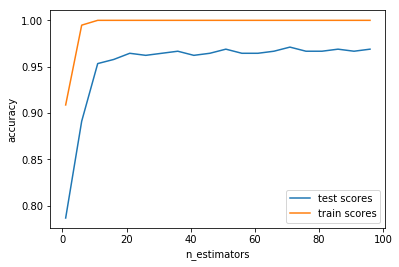

In [6]:
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

# out of bag predictions

In [8]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

Text(0.5,0,'max_features')

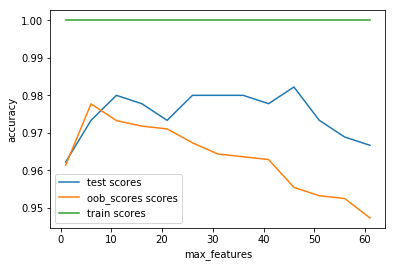

In [9]:
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("max_features")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=1)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [11]:
rf.feature_importances_

array([0.05 , 0.013, 0.032, 0.045, 0.004, 0.022, 0.071, 0.105, 0.004,
       0.003, 0.015, 0.004, 0.019, 0.046, 0.003, 0.004, 0.008, 0.003,
       0.004, 0.005, 0.12 , 0.018, 0.129, 0.085, 0.01 , 0.018, 0.045,
       0.097, 0.012, 0.006])

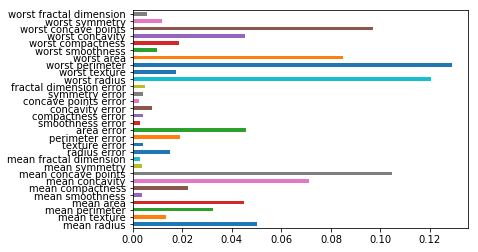

In [12]:
pd.Series(rf.feature_importances_,
          index=cancer.feature_names).plot(kind="barh")

# Exercise
Use a random forest classifier or random forest regressor on a dataset of your choice.
Try different values of n_estimators and max_depth and see how they impact performance and runtime.
Tune ``max_features`` with GridSearchCV.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler


dbf = pd.read_csv("data/adult.csv", index_col=0)

# identify the dependent variable
income = dbf.income
data_features = dbf.drop("income", axis=1)

# one hot encoding
data_one_hot = pd.get_dummies(data_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income
                                                    , stratify=income, random_state=0)

# Scale training data
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [14]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 20, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

In [29]:
plt.rcParams["figure.dpi"] = 300

rf = RandomForestClassifier(max_features=5, max_depth=3, min_samples_leaf=80).fit(X_train, y_train)

rf.feature_importances_[1:20]


array([0.06 , 0.088, 0.022, 0.032, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.005, 0.   , 0.   , 0.   , 0.   ,
       0.   ])

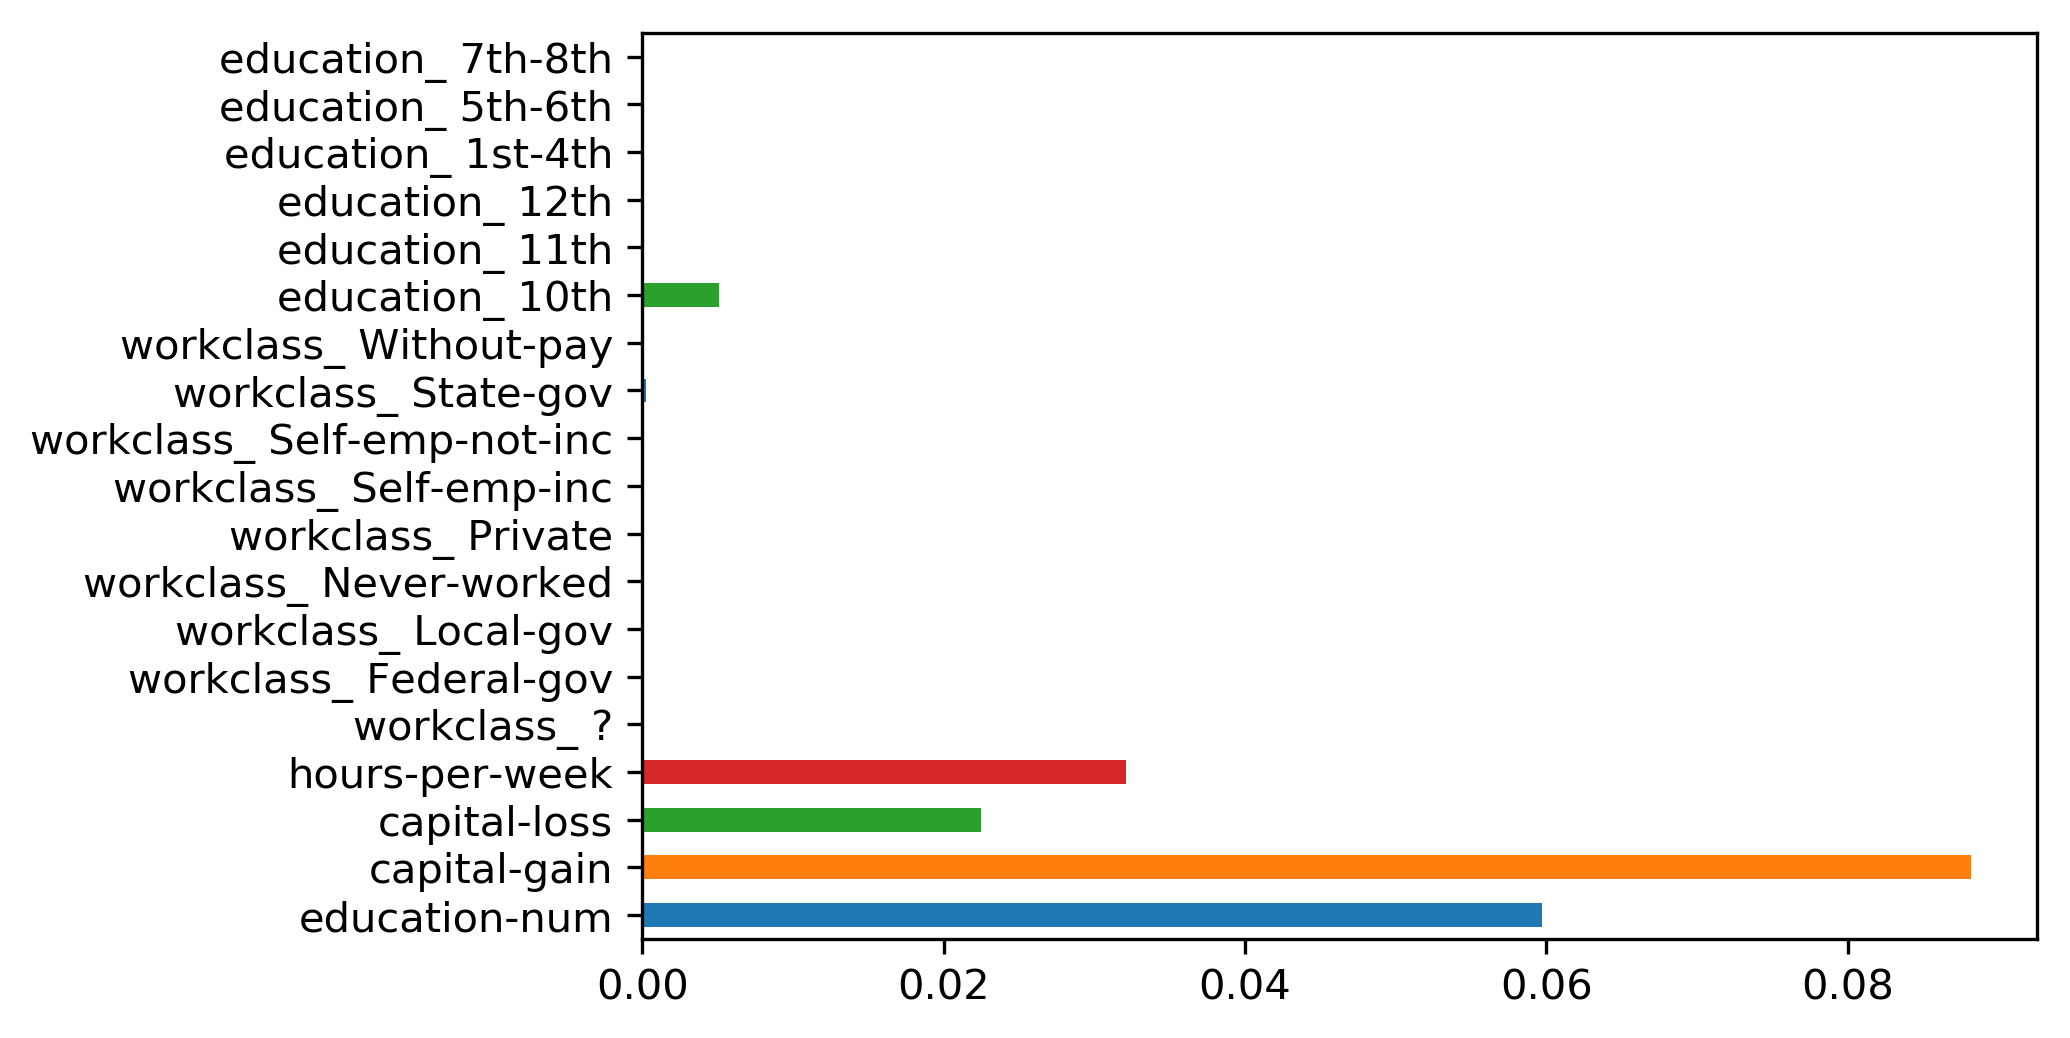

In [30]:

pd.Series(rf.feature_importances_[1:20],
          index=X_train.columns.values[1:20]).plot(kind="barh")